In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import math

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_csv('df_combined.csv')

/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df.sample(frac = 0.15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12409 entries, 59612 to 35542
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fullVisitorId         12409 non-null  object 
 1   channelGrouping       12409 non-null  object 
 2   socialEngagementType  12409 non-null  object 
 3   visitNumber           12409 non-null  int64  
 4   visitStartTime        12409 non-null  float64
 5   browser               12409 non-null  object 
 6   operatingSystem       12409 non-null  object 
 7   isMobile              12409 non-null  int64  
 8   deviceCategory        12409 non-null  object 
 9   continent             12409 non-null  object 
 10  subContinent          12409 non-null  object 
 11  country               12409 non-null  object 
 12  region                12409 non-null  object 
 13  metro                 12409 non-null  object 
 14  city                  12409 non-null  object 
 15  networkDomain  

In [5]:
df = df.drop(['fullVisitorId'], axis=1)

In [6]:
categorical_feat = ['channelGrouping', 'socialEngagementType', 'browser', 'operatingSystem', 
                    'deviceCategory', 'continent', 'subContinent', 'country', 'region', 'metro',
                   'city', 'networkDomain', 'campaign', 'source', 'medium', 'keyword', 'referralPath', 'isTrueDirect']

In [7]:
for feature in categorical_feat:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(list(df[feature].values.astype('str')))
    df[feature] = label_encoder.transform(list(df[feature].values.astype('str'))) 
    print("for this feature : {0} label-encoding was done succesfully".format(feature))

for this feature : channelGrouping label-encoding was done succesfully
for this feature : socialEngagementType label-encoding was done succesfully
for this feature : browser label-encoding was done succesfully
for this feature : operatingSystem label-encoding was done succesfully
for this feature : deviceCategory label-encoding was done succesfully
for this feature : continent label-encoding was done succesfully
for this feature : subContinent label-encoding was done succesfully
for this feature : country label-encoding was done succesfully
for this feature : region label-encoding was done succesfully
for this feature : metro label-encoding was done succesfully
for this feature : city label-encoding was done succesfully
for this feature : networkDomain label-encoding was done succesfully
for this feature : campaign label-encoding was done succesfully
for this feature : source label-encoding was done succesfully
for this feature : medium label-encoding was done succesfully
for this feat

## Get dummies

In [8]:
X = df.drop(columns='transactionRevenue', axis = 1)
y = np.log1p(df['transactionRevenue'].fillna(0).astype(float))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

## Standardize

In [10]:
#Call the StandardScaler`s fit method
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [11]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectFromModel(RandomForestRegressor(n_estimators=1000), max_features=5)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [12]:
model = LinearRegression()
model.fit(X_train_fs, y_train)
y_pred = model.predict(X_test_fs)

In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.1519360356051222
MAE:  0.01954442126174171
r2 Score:  0.9541341593112762


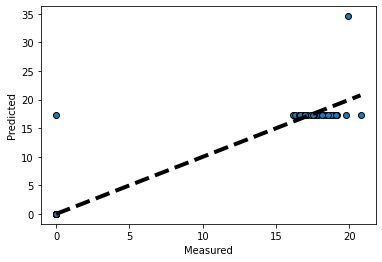

In [14]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Decision Tree

In [15]:
model = DecisionTreeRegressor()

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
               'splitter': ['best', 'random']}

In [16]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=False, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='mae', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=300)


In [17]:
y_pred = dt_random.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.0955580547946409
MAE:  0.01363400324377665
r2 Score:  0.9711533179059229


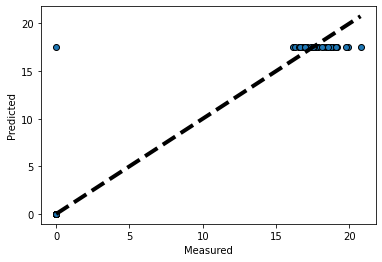

In [22]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Random Forest Regession

In [23]:
model = RandomForestRegressor()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'mae']}


In [28]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=False, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=200, min_samples_leaf=30, min_samples_split=500,
                      n_estimators=45)


In [29]:
y_pred = rf_random.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.09594720244370883
MAE:  0.013604563911604988
r2 Score:  0.9710358435753241


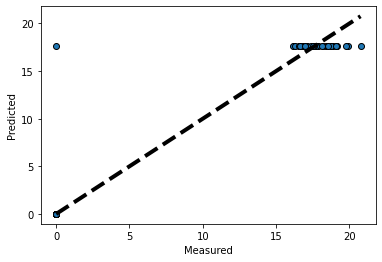

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Gradient Boosting Regession

In [32]:
model = GradientBoostingRegressor()

parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
               'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['friedman_mse', 'mse', 'mae']}

In [33]:
gb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", gb_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.2, max_depth=15, max_features='auto',
                          min_samples_leaf=25, min_samples_split=3,
                          n_estimators=30)


In [34]:
y_pred = gb_random.predict(X_test)

In [35]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.10589772664216442
MAE:  0.015587600213587769
r2 Score:  0.9680320192630866


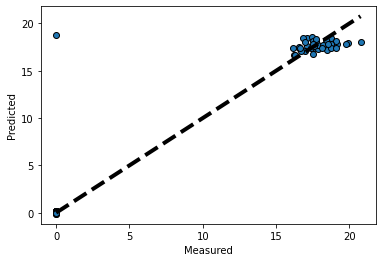

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## MLPRegressor

In [37]:
model = MLPRegressor(max_iter=100)

parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [38]:
mlp_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 5, 
                               random_state=42, n_jobs = -1)
mlp_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mlp_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPRegressor(activation='logistic', alpha=0.05,
             hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
             max_iter=100, solver='lbfgs')


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
y_pred = mlp_random.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.0961799313841988
MAE:  0.01941737852089272
r2 Score:  0.9709655882967416


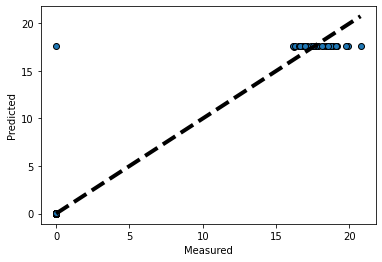

In [41]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## LightGBM

In [42]:
import lightgbm
model = lightgbm.LGBMRegressor()
         
parameters = {'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
              'num_leaves': [30, 32, 35, 40, 45, 50],
              'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
              'n_estimators': [5,10,15,20,25,30,40,50,75,100,200, 500, 1000],
              'reg_alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'reg_lambda': [0.001,0.01,0.05,0.1,0.2,0.3],
              'subsample': [0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1],
              'subsample_freq': [0, 0.5, 1],
              'colsample_bytree': [0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1]}

In [43]:
lgbm_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=False, random_state=42, n_jobs = -1)
lgbm_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", lgbm_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 LGBMRegressor(boosting_type='dart', colsample_bytree=0.9, learning_rate=0.2,
              max_depth=200, n_estimators=20, num_leaves=32, reg_alpha=0.2,
              reg_lambda=0.001, subsample=0.9, subsample_freq=1)


/Users/kasey.larsen/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.16858075 0.11706081 0.99240406 0.99301714 0.83056362
 0.97992981 0.98958601        nan 0.86845488]
  warnings.warn(


In [44]:
y_pred = mlp_random.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.0961799313841988
MAE:  0.01941737852089272
r2 Score:  0.9709655882967416


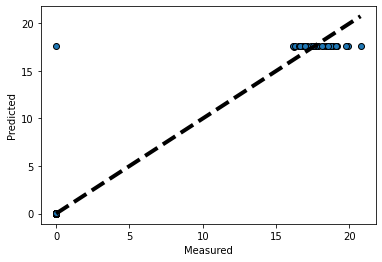

In [46]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# PCA

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Decision Tree Regressor With PCA

In [48]:
model = DecisionTreeRegressor()

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
               'splitter': ['best', 'random']}

In [49]:
dt_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
dt_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", dt_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(criterion='mae', max_depth=20, max_features='auto',
                      min_samples_leaf=5, min_samples_split=300)


In [50]:
y_pred = dt_random.predict(X_test)

In [51]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.5048953121783066
MAE:  0.037140502888604356
r2 Score:  0.8475842293724231


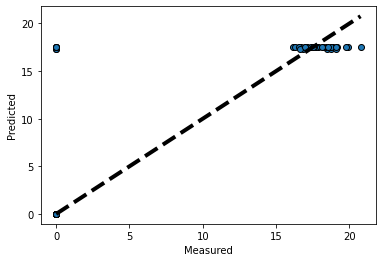

In [52]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Random Forest Regession With PCA

In [53]:
model = RandomForestRegressor()

parameters = {'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['mse', 'mae']}


In [54]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", rf_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(criterion='mae', max_depth=3, min_samples_split=650,
                      n_estimators=40)


In [55]:
y_pred = rf_random.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.29823455606245747
MAE:  0.03783286143626399
r2 Score:  0.9099701490712596


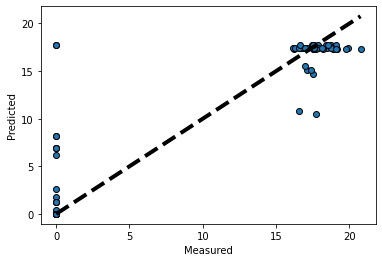

In [57]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Gradient Boosting Regession With PCA

In [58]:
model = GradientBoostingRegressor()

parameters = {'loss': ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate': [0.001,0.01,0.05,0.1,0.2,0.3],
               'n_estimators': [5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,200],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [3,4,5,10,15,20,25,50,75,100,125,150,200, None],
               'min_samples_split': [3,10,50,100,150,200,250,300,350,400,450,500,550,600,650,700],
               'min_samples_leaf': [1,2,3,4,5,10,20,25, 30, 50, 75, 100],
               'criterion': ['friedman_mse', 'mse', 'mae']}

In [59]:
gb_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, n_iter = 10, cv = 5, 
                               random_state=42, n_jobs = -1)
gb_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", gb_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.2, max_depth=15, max_features='auto',
                          min_samples_leaf=25, min_samples_split=3,
                          n_estimators=30)


In [60]:
y_pred = gb_random.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.24179024092805257
MAE:  0.03682473709673767
r2 Score:  0.9270093324054038


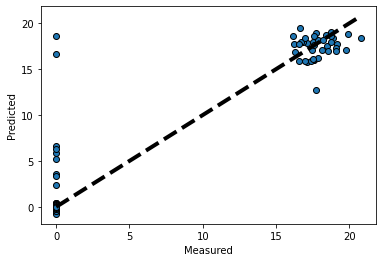

In [62]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## MLPRegressor With PCA

In [63]:
model = MLPRegressor(max_iter=100)

parameters = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
              'alpha': [0.001,0.01,0.05,0.1,0.2,0.3],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'solver' : ['lbfgs', 'sgd', 'adam'],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

In [64]:
mlp_random = RandomizedSearchCV(estimator = model, param_distributions = parameters, cv = 5, 
                               random_state=42, n_jobs = -1)
mlp_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", mlp_random.best_estimator_)

 Results from Random Search 

 The best estimator across ALL searched params:
 MLPRegressor(activation='logistic', alpha=0.001, max_iter=100, solver='sgd')


In [65]:
y_pred = mlp_random.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('MAE: ', mae)
print('r2 Score: ', r2)

MSE:  0.09817409357810226
MAE:  0.05225131730255388
r2 Score:  0.9703635986164871


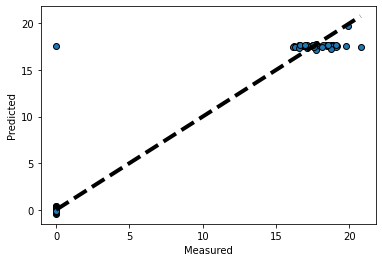

In [67]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Best Model Selection